In [1]:
from wrangle_data_funcs import *
from modelling_funcs import *
from predict_gw_scores import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from outputs.other_funcs import *

# Running

## get_params

In [2]:
training_years, training_n_gws, pred_year, pred_gw, alpha, rolling_gws, features, model_func, avg_type, output = get_params()

## get_training_df

In [3]:
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


## Everything else

In [4]:
_ = test_model(training_df, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, avg_type, alpha, rolling_gws)
pred_df = train_full_model(training_df, features, prediction_df, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]


{'GK': 2.295, 'DEF': 2.257, 'MID': 2.221, 'FWD': 2.528}


# again

In [5]:
training_years, training_n_gws, pred_year, pred_gw, alpha, rolling_gws, features, model_func, avg_type, output = get_params()
# print(training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output)
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)
training_df_scaled, _ = scale_df(training_df, features)
_ = test_model(training_df_scaled, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, avg_type, alpha, rolling_gws)
prediction_df_scaled, _ = scale_df(prediction_df, features)
pred_df = train_full_model(training_df_scaled, features, prediction_df_scaled, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


{'GK': 2.295, 'DEF': 2.257, 'MID': 2.221, 'FWD': 2.528}


In [6]:
pred_df_simple_before = pd.read_csv('outputs/predicted_gw18_simple.csv')

In [7]:
pred_df_simple.sort_values(by='predicted_points', ascending=False).head(10)

,full_name,position,team,ewma_total_points,predicted_points,owner
212,erling_haaland,FWD,Man City,4.012176,6.805962,88376.0
103,bukayo_saka,MID,Arsenal,3.160162,6.243589,87737.0
236,florian_wirtz,MID,Liverpool,3.018159,5.645691,85076.0
613,phil_foden,MID,Man City,2.024142,5.626343,88376.0
278,hugo_ekitike,FWD,Liverpool,3.444167,5.601282,85646.0
623,rayan_cherki,MID,Man City,3.302164,5.591522,85646.0
51,antoine_semenyo,MID,Bournemouth,3.586169,5.480732,87737.0
514,matheus_santos_carneiro_da_cunha,MID,Man Utd,2.308147,5.285246,88376.0
552,morgan_rogers,MID,Aston Villa,3.870174,5.201167,93330.0
273,harry_wilson,MID,Fulham,2.876157,5.053008,85646.0


In [8]:
pred_df_simple_combined = pred_df_simple.merge(pred_df_simple_before[['full_name', 'predicted_points']], on=['full_name'], suffixes=('_after', '_before'))

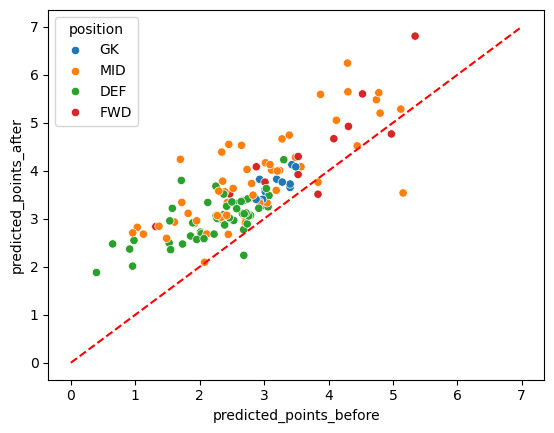

In [9]:
sns.scatterplot(data=pred_df_simple_combined.query('ewma_total_points>1'), x='predicted_points_before', y='predicted_points_after', hue='position')
plt.plot([0, 7], [0, 7], color='red', linestyle='--')

# Checking coeffs

In [10]:
def train_full_model(training_df, features, prediction_df, model_func):
    model_dict, _ = create_model(training_df, features, model_func, test=False)
    pred_df = predict_scores(prediction_df.dropna(), features, model_dict)
    return pred_df, model_dict

In [11]:
training_years, training_n_gws, pred_year, pred_gw, alpha, rolling_gws, features, model_func, avg_type, output = get_params()
# print(training_year, training_n_gws, pred_year, pred_gw, alpha, features, model, output)
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)
training_df_scaled, _ = scale_df(training_df, features)
_ = test_model(training_df_scaled, features, model_func)
prediction_df = get_prediction_df(pred_year, pred_gw, avg_type, alpha, rolling_gws)
prediction_df_scaled, _ = scale_df(prediction_df, features)
pred_df, model_dict = train_full_model(training_df_scaled, features, prediction_df_scaled, model_func)
pred_df = merge_ownership_data(pred_df)
pred_df_simple = pred_df[['full_name', 'position', 'team', 'ewma_total_points', 'predicted_points', 'owner']]

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


{'GK': 2.295, 'DEF': 2.257, 'MID': 2.221, 'FWD': 2.528}


{'GK': 2.287, 'DEF': 2.254, 'MID': 2.211, 'FWD': 2.508} - with total points
{'GK': 2.288, 'DEF': 2.257, 'MID': 2.221, 'FWD': 2.527} - without total points, but with tranfers in/out/balance


In [12]:
coefs = pd.DataFrame({'GK': model_dict['GK'].coef_,
              'DEF': model_dict['DEF'].coef_,
              'MID': model_dict['MID'].coef_,
              'FWD': model_dict['FWD'].coef_}, index=features
              )

In [13]:
coefs

,GK,DEF,MID,FWD
xP,0.078257,0.126777,0.127991,0.127323
assists,0.000000,0.000000,0.000000,-0.034823
bonus,-0.000000,0.000000,-0.000000,0.030846
bps,0.208825,0.119664,0.000000,0.023066
clean_sheets,0.054842,0.000000,0.042971,0.000000
creativity,0.000000,0.091085,0.087547,0.076120
expected_assists,0.000000,0.004048,0.042005,0.069762
expected_goal_involvements,0.000000,0.000000,0.032448,0.000000
expected_goals,-0.000000,0.000000,0.000000,0.000000
expected_goals_conceded,-0.000000,0.000000,0.005156,0.084974


<Axes: xlabel='expected_goals', ylabel='total_points_nw'>

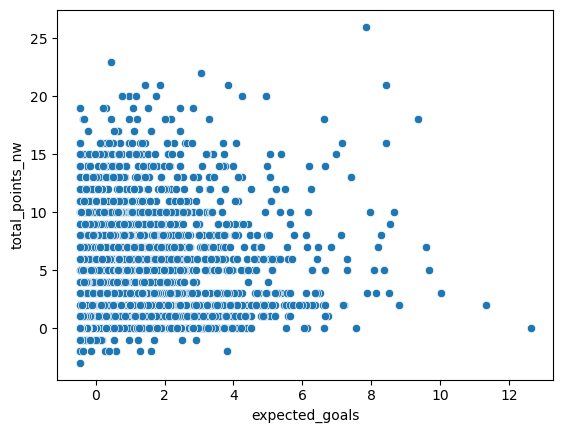

In [14]:
sns.scatterplot(data=training_df_scaled.query('position=="MID"'), x='expected_goals', y='total_points_nw')

In [15]:
training_df = get_training_df(training_years, training_n_gws, avg_type, alpha, rolling_gws)

c:\Users\dellis2\OneDrive - Illumina, Inc\Documents\fpl\draft_fpl_2526\transfer\wrangle_data_funcs.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gw_df = pd.concat(gw_df_list)


In [16]:
owner_dict = get_owner_dict()
pred_df_simple['owner'] = pred_df_simple['owner'].map(owner_dict)
pred_df_simple['owner'] = pred_df_simple['owner'].fillna('no_owner')

C:\Users\dellis2\AppData\Local\Temp\ipykernel_27236\4030438067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df_simple['owner'] = pred_df_simple['owner'].map(owner_dict)
C:\Users\dellis2\AppData\Local\Temp\ipykernel_27236\4030438067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df_simple['owner'] = pred_df_simple['owner'].fillna('no_owner')


In [17]:
lucas_picked = pred_df_simple.query('owner=="Lucas" and full_name not in ["gianluigi_donnarumma", "mohammed_kudus", "riccardo_calafiori", "raul_jimenez_rodriguez"]')
lucas_picked['predicted_points'].sum()

np.float64(38.33728201184271)

In [18]:
nico = "nico_o'reilly"
doug_picked = pred_df_simple.query('owner=="Doug" and full_name not in ["bart_verbruggen", @nico, "pedro_lomba_neto", "alexander_isak"]')
doug_picked['predicted_points'].sum()

np.float64(45.764801034788626)

<Axes: xlabel='expected_goals', ylabel='total_points_nw'>

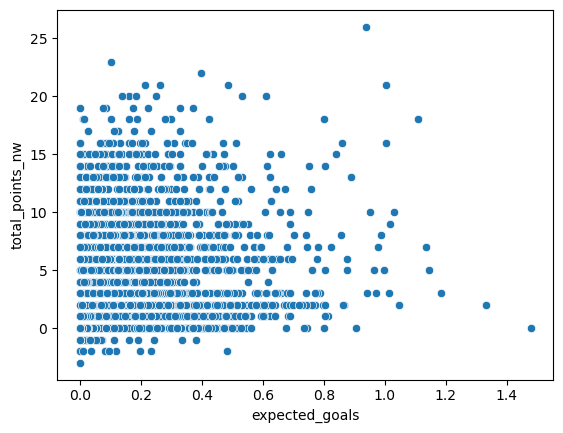

In [19]:
sns.scatterplot(data=training_df.query('position=="MID"'), x='expected_goals', y='total_points_nw')